In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/justin/.local/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from itertools import product
from os.path import *
from os import *
import cPickle as pickle
import sys

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
from icecube.dataclasses import *
from icecube import *
from icecube.icetray import *

In [5]:
from icecube.clsim import MakeIceCubeMediumProperties

In [6]:
from plotGoodies import removeBorder

In [7]:
!pwd

/home/justin/src/retro/notebooks


In [8]:
sys.path.append(expandvars('$I3_SRC/clsim/python/util'))
sys.path.append(abspath('..'))

from GetIceTiltZShift import GetIceTiltZShift, I3CLSimScalarFieldIceTiltZShift
from retro.const import get_sd_idx
from retro.utils.geom import powerspace

In [10]:
gcd = pickle.load(file('../data/GeoCalibDetectorStatus_IC86.55697_corrected_V2.pkl', 'rb'))
geo = gcd['geo']

In [11]:
ice_model = 'spice_lea'

In [12]:
hexcoord0_rows_strings = [
    list(range(1, 7)),
    list(range(7, 14)),
    list(range(14, 22)),
    list(range(22, 31)),
    list(range(31, 41)),
    list(range(41, 51)),
    list(range(51, 60)),
    list(range(60, 68)),
    list(range(68, 75)),
    list(range(75, 79))
]
hexcoord1_rows_strings = [
    [1,7,14,22,31],
    [2,8,15,23,32,41],
    [3,9,16,24,33,42,51],
    [4,10,17,25,34,43,52,60],
    [5,11,18,26,35,44,53,61,68],
    [6,12,19,27,36,45,54,62,69,75],
    [13,20,28,37,46,55,63,70,76],
    [21,29,38,47,56,64,71,77],
    [30,39,48,57,65,72,78],
    [40,49,58,66,73],
    [50,59,67,74]
]
hexcoord2_rows_strings = [
    [31,41,51,60,68,75],
    [22,32,42,52,61,69,76],
    [14,23,33,43,53,62,70,77],
    [7,15,24,34,44,54,63,71,78],
    [1,8,16,25,35,45,55,64,72],
    [2,9,17,26,36,46,56,65,73],
    [3,10,18,27,37,47,57,66,74],
    [4,11,19,28,38,48,58,67],
    [5,12,20,29,39,49,59],
    [6,13,21,30,40,50]
]

hexcoord0_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord0_rows_strings]
hexcoord0_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord0_rows_strings]

hexcoord1_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord1_rows_strings]
hexcoord1_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord1_rows_strings]

hexcoord2_x = [[geo[s-1, 0, 0] for s in strings] for strings in hexcoord2_rows_strings]
hexcoord2_y = [[geo[s-1, 0, 1] for s in strings] for strings in hexcoord2_rows_strings]

np.array(zip(hexcoord0_x[0], hexcoord0_y[0]))

array([[-256.14001465, -521.08001709],
       [-132.80000305, -501.45001221],
       [  -9.13000011, -481.73999023],
       [ 114.38999939, -461.98999023],
       [ 237.77999878, -442.42001343],
       [ 361.        , -422.82998657]])

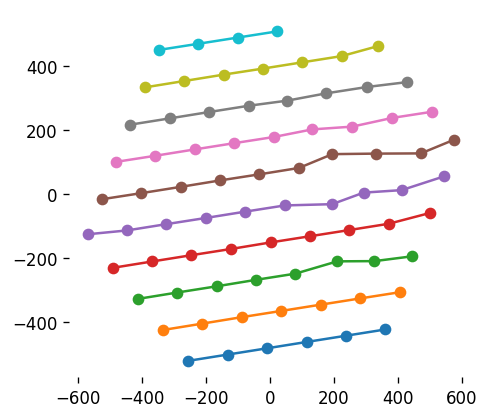

In [13]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord0_x)):
    ax.plot(hexcoord0_x[row], hexcoord0_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

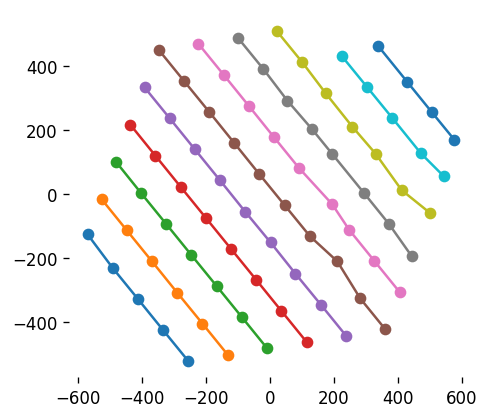

In [14]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord1_x)):
    ax.plot(hexcoord1_x[row], hexcoord1_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

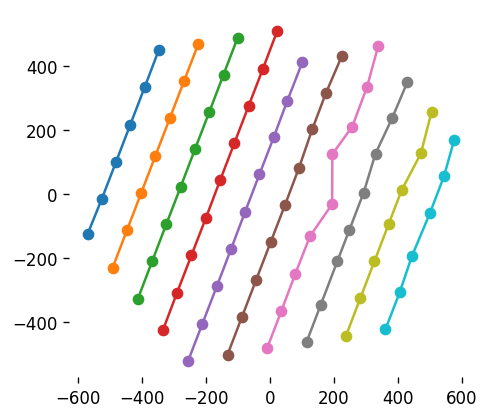

In [15]:
fig, ax = plt.subplots(dpi=120)
for row in range(len(hexcoord2_x)):
    ax.plot(hexcoord2_x[row], hexcoord2_y[row], 'o-')
ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

In [16]:
# Copyright (c) 2013, Robin Wilson
# All rights reserved.
#
# Redistribution and use in source and binary forms, with or without
# modification, are permitted provided that the following conditions are met:
# * Redistributions of source code must retain the above copyright
# notice, this list of conditions and the following disclaimer.
# * Redistributions in binary form must reproduce the above copyright
# notice, this list of conditions and the following disclaimer in the
# documentation and/or other materials provided with the distribution.
# * Neither the name of Robin Wilson nor the
# names of its contributors may be used to endorse or promote products
# derived from this software without specific prior written permission.
#
# THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND
# ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED
# WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
# DISCLAIMED. IN NO EVENT SHALL <COPYRIGHT HOLDER> BE LIABLE FOR ANY
# DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES
# (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES;
# LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND
# ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT
# (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS
# SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
from scipy.odr import Model, Data, ODR
from scipy.stats import linregress
import numpy as np


def func(p, x):
    """Basic linear regression 'model' for use with ODR"""
    return p[0] * x + p[1]


def orthoregress(x, y):
    """Perform an Orthogonal Distance Regression on the given data,
    using the same interface as the standard scipy.stats.linregress function.

    Arguments:
    x: x data
    y: y data

    Returns:
    [m, c, nan, nan, nan]

    Uses standard ordinary least squares to estimate the starting parameters
    then uses the scipy.odr interface to the ODRPACK Fortran code to do the
    orthogonal distance calculations.
    """
    linreg = linregress(x, y)
    mod = Model(func)
    dat = Data(x, y)
    od = ODR(dat, mod, beta0=linreg[0:2])
    out = od.run()

    return out.beta

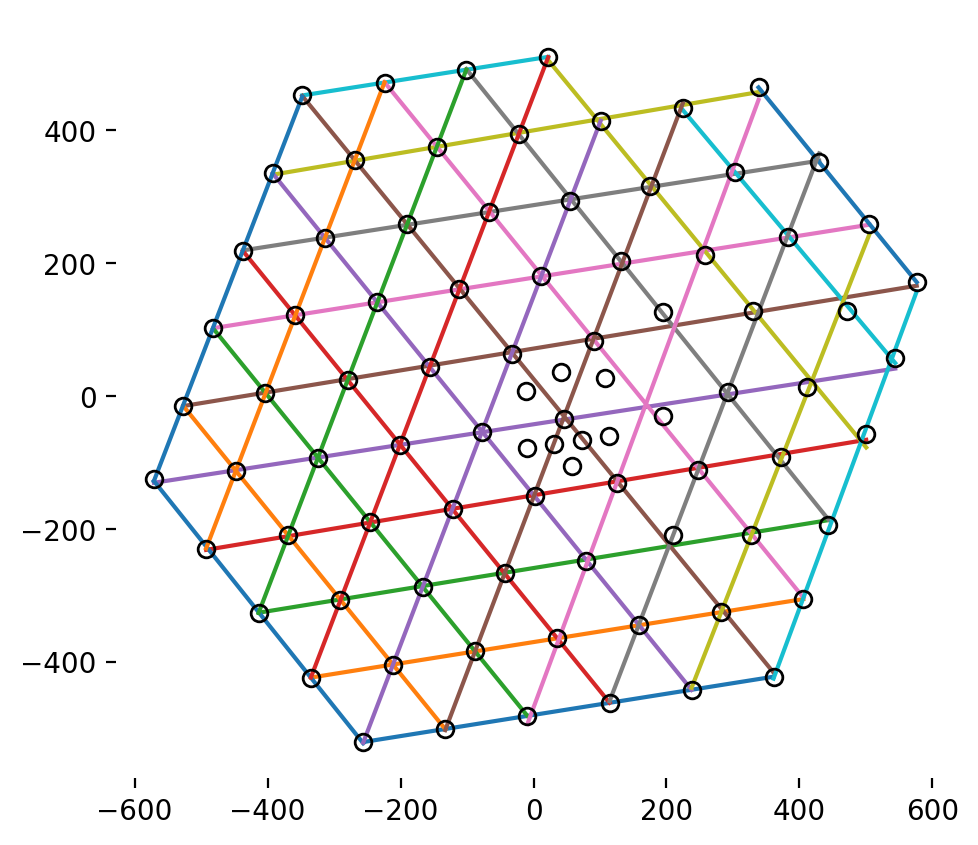

In [17]:
fig, ax = plt.subplots(figsize=(9, 5), dpi=200)

hexcoord0_params = []
hexcoord1_params = []
hexcoord2_params = []

for row in range(len(hexcoord0_x)):
    x, y = hexcoord0_x[row], hexcoord0_y[row]
    m, b = orthoregress(x, y)
    hexcoord0_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c)

for row in range(len(hexcoord1_x)):
    x, y = hexcoord1_x[row], hexcoord1_y[row]
    m, b = orthoregress(x, y)
    hexcoord1_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c)

for row in range(len(hexcoord2_x)):
    x, y = hexcoord2_x[row], hexcoord2_y[row]
    m, b = orthoregress(x, y)
    hexcoord2_params.append((m, b))
    f = lambda x_: m*np.array(x_) + b
    c = 'C{}'.format(row % 10)
    ax.plot(x, f(x), '-', c=c)

for s_idx in range(86):
    x, y = geo[s_idx, 0, 0:2]
    ax.plot(x, y, 'ko', mfc='none')

hexcoord0_params = np.array(hexcoord0_params)
hexcoord1_params = np.array(hexcoord1_params)
hexcoord2_params = np.array(hexcoord2_params)

ax.axis('image')
removeBorder(ax, left=False, bottom=False)
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
pass

hexcoord0_m: 1.593272477001317e-01
hexcoord1_m: 1.232276522636381e+00
hexcoord2_m: 2.614813855806950e+00


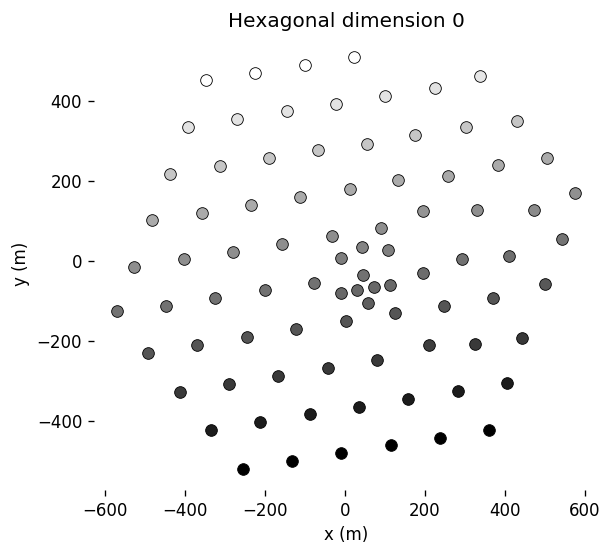

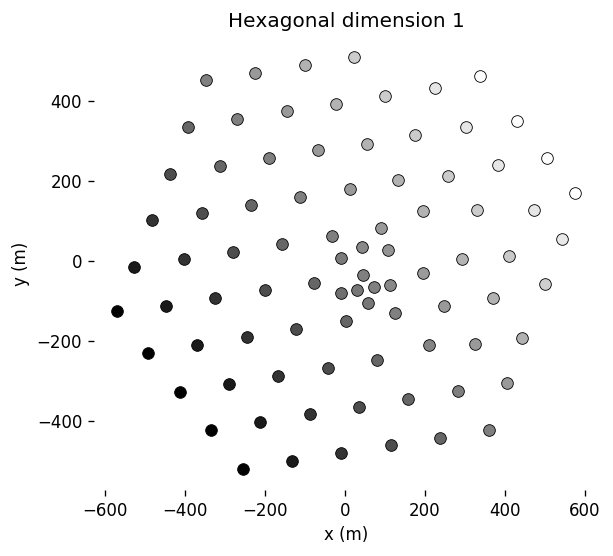

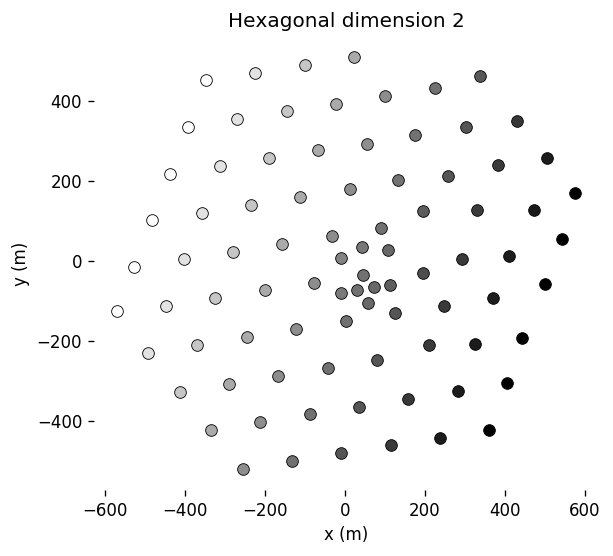

In [18]:
hexcoord0_m = np.median(hexcoord0_params[:, 0])
hexcoord1_m = -np.median(hexcoord1_params[:, 0])
hexcoord2_m = np.median(hexcoord2_params[:, 0])

print 'hexcoord0_m: {:.15e}'.format(hexcoord0_m)
print 'hexcoord1_m: {:.15e}'.format(hexcoord1_m)
print 'hexcoord2_m: {:.15e}'.format(hexcoord2_m)

get_hc0_coord = lambda x, y: y/hexcoord0_m - x
get_hc1_coord = lambda x, y: y/hexcoord1_m + x
get_hc2_coord = lambda x, y: y/hexcoord2_m - x

hc0 = get_hc0_coord(geo[:, 0, 0], geo[:, 0, 1])
hc1 = get_hc1_coord(geo[:, 0, 0], geo[:, 0, 1])
hc2 = get_hc2_coord(geo[:, 0, 0], geo[:, 0, 1])

hc0_range = hc0.max() - hc0.min()
hc1_range = hc1.max() - hc1.min()
hc2_range = hc2.max() - hc2.min()

for cnum, hc in enumerate([hc0, hc1, hc2]):
    fig, ax = plt.subplots(figsize=(9, 5), dpi=120)
    ax.set_title('Hexagonal dimension {}'.format(cnum))

    for s_idx in range(86):
        x, y = geo[s_idx, 0, 0:2]
        c = ((hc[s_idx] - hc.min())/(hc.max() - hc.min()),)*3
        ax.plot(x, y, 'o', mfc=c, mec='k', mew=0.5, ms=7)

    ax.axis('image')
    removeBorder(ax, left=False, bottom=False)
    ax.yaxis.tick_left()
    ax.xaxis.tick_bottom()
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
pass

See `ice_layer_properties_validation.ipynb` for validation that I'm computing layer indices using the CLSim tool correctly.

In [19]:
ice_model = 'spice_lea'

In [20]:
ice_props, ice_params = MakeIceCubeMediumProperties(
    detectorCenterDepth=1948.07*I3Units.m,
    iceDataDirectory=expandvars('$I3_SRC/ice-models/resources/models/' + ice_model),
    useTiltIfAvailable=True,
    returnParameters=True
)
ice_params

{'anisotropyDirAzimuth': 3.7699111843077517,
 'anisotropyMagnitudeAlongDir': 0.04,
 'anisotropyMagnitudePerpToDir': -0.08}

In [21]:
!cat /cvmfs/icecube.opensciencegrid.org/py2-v3/Ubuntu_16.04_x86_64/metaprojects/combo/stable/ice-models/resources/models/$ice_model/cfg.txt

# ppc configuration file: follow strict order below
5     # over-R: DOM radius "oversize" scaling factor
1.0   # overall DOM efficiency correction
0.41  # 0=HG; 1=SAM
0.9   # g=<cos(theta)>

216   # direction of ice tilt (perp. to flow)
0.04  # magnitude of ice anisotropy along tilt
-0.08 # magnitude of ice anisotropy along flow


In [22]:
rootdir = (
    '/cvmfs/icecube.opensciencegrid.org/py2-v3/Ubuntu_16.04_x86_64/'
    'metaprojects/combo/stable/ice-models/resources/models/{}'
).format(ice_model)

cfg = np.loadtxt(join(rootdir, 'cfg.txt'))
print 'cfg.txt shape:', cfg.shape

oversize_scaling = cfg[0]
efficiency_correction = cfg[1]
liu_scattering_fraction = cfg[2]
mean_cos_scattering_theta = cfg[3]

print 'mean_cos_scattering_theta:', mean_cos_scattering_theta

icemodel_par = np.loadtxt(join(rootdir, 'icemodel.par'))
print 'icemodel.par shape:', icemodel_par.shape
if False: #ice_model == 'spice_mie':
    assert icemodel_par.shape[0] == 6
    alpha, kappa, A, B, D, E = icemodel_par[:, 0].T
    print 'alpha={}, kappa={}, A={}, B={}, D={}, E={}'.format(alpha, kappa, A, B, D, E)
else: # ice_model == 'spice_lea':
    #assert icemodel_par.shape[0] == 4
    alpha, kappa, A, B = icemodel_par[:, 0].T[:4]
    print 'alpha={}, kappa={}, A={}, B={}'.format(alpha, kappa, A, B)
#else:
#    raise ValueError(ice_model)
    
icemodel = np.loadtxt(join(rootdir, 'icemodel.dat'))
print 'icemodel.dat shape:', icemodel.shape

# first column: z layer *depth* midpoints
zlayermidpts = icemodel[:, 0]
# second column: b_e(400) values
be400 = icemodel[:, 1]
# third column: adust(400) values
adust400 = icemodel[:, 2]
# fourth column: delta_tau values
delta_tau = icemodel[:, 3]

cfg.txt shape: (7,)
mean_cos_scattering_theta: 0.9
icemodel.par shape: (4, 2)
alpha=0.898608505726, kappa=1.08410680294, A=6954.09033203, B=6617.75439453
icemodel.dat shape: (171, 4)


In [23]:
%%time

wavelen = 555e-9 * I3Units.m
n_strings = 86
n_doms_per_string = 60
n_doms = 86 * 60
z0 = ice_props.GetLayersZStart()
dz = ice_props.GetLayersHeight()
zshift = ice_props.GetIceTiltZShift()

properties = [None]*n_doms
for s_idx, d_idx in product(range(n_strings), range(n_doms_per_string)):
    string = s_idx + 1
    dom = d_idx + 1
    sd_idx = get_sd_idx(string=string, dom=dom)
    x, y, z = geo[s_idx, d_idx]
    sl = []
    al = []
    for r, costheta, phi in product(
            powerspace(0.1, 200, 5, 5),
            np.linspace(np.cos(np.pi), np.cos(0), 9),
            np.arange(0, 2*np.pi, np.pi/4)
        ):
        sintheta = np.sin(np.arccos(costheta))
        z_ = z + r * costheta
        x_ = x + r * sintheta * np.cos(phi)
        y_ = y + r * sintheta * np.sin(phi)

        # Original sign convention: z + zshift - z0; this has now been
        # verified by comparing against a "manual" calculation of the
        # ice scattering length.
        layer_num = int((z_ - z0 + zshift.GetValue(x_, y_, z_)) / dz)
        # Alternative sign convention
        layer_num = int((z_ - z0 - zshift.GetValue(x_, y_, z_)) / dz)

        al.append(ice_props.GetAbsorptionLength(layer_num).GetValue(wavelen))
        sl.append(ice_props.GetScatteringLength(layer_num).GetValue(wavelen))

    zequiv = z + zshift.GetValue(x, y, z)
    layer_num = int((zequiv - z0) / dz)
    properties[sd_idx] = (
        [
            x,
            y,
            z,
            zequiv,
            get_hc0_coord(x, y),
            get_hc1_coord(x, y),
            get_hc2_coord(x, y),
            ice_props.GetAbsorptionLength(layer_num).GetValue(wavelen),
            ice_props.GetScatteringLength(layer_num).GetValue(wavelen)
        ]
        + al
        + sl
    )
properties = np.array(properties)

CPU times: user 22.2 s, sys: 360 ms, total: 22.6 s
Wall time: 22.3 s


In [24]:
np.save('../data/dom_clustering_properties_binned_opposite_sign_convention.npy', properties)